<a href="https://colab.research.google.com/github/meitalhp/DataSet_project/blob/main/EDA_main_data_gett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns


In [2]:
data=pd.read_csv('ArielU - Waiting Time Base.csv')


In [3]:
October_not_included = True
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])
if October_not_included:
    data = data[data['start_time'] <= '2023-10-01']
    data = data[data['end_time'] <= '2023-09-30']


data.sort_values('start_time', inplace=True)
data = data.reset_index(drop=True)
data

,start_time,end_time,wait
0,2022-09-01 00:00:00,2022-09-01 00:15:00,42
1,2022-09-01 00:00:00,2022-09-01 00:15:00,42
2,2022-09-01 00:00:00,2022-09-01 00:15:00,41
3,2022-09-01 00:00:00,2022-09-01 00:15:00,30
4,2022-09-01 00:00:00,2022-09-01 00:15:00,41
...,...,...,...
906926,2023-09-29 23:45:00,2023-09-30 00:00:00,9
906927,2023-09-29 23:45:00,2023-09-30 00:00:00,16
906928,2023-09-29 23:45:00,2023-09-30 00:00:00,18
906929,2023-09-29 23:45:00,2023-09-30 00:00:00,8


Displaying all the data

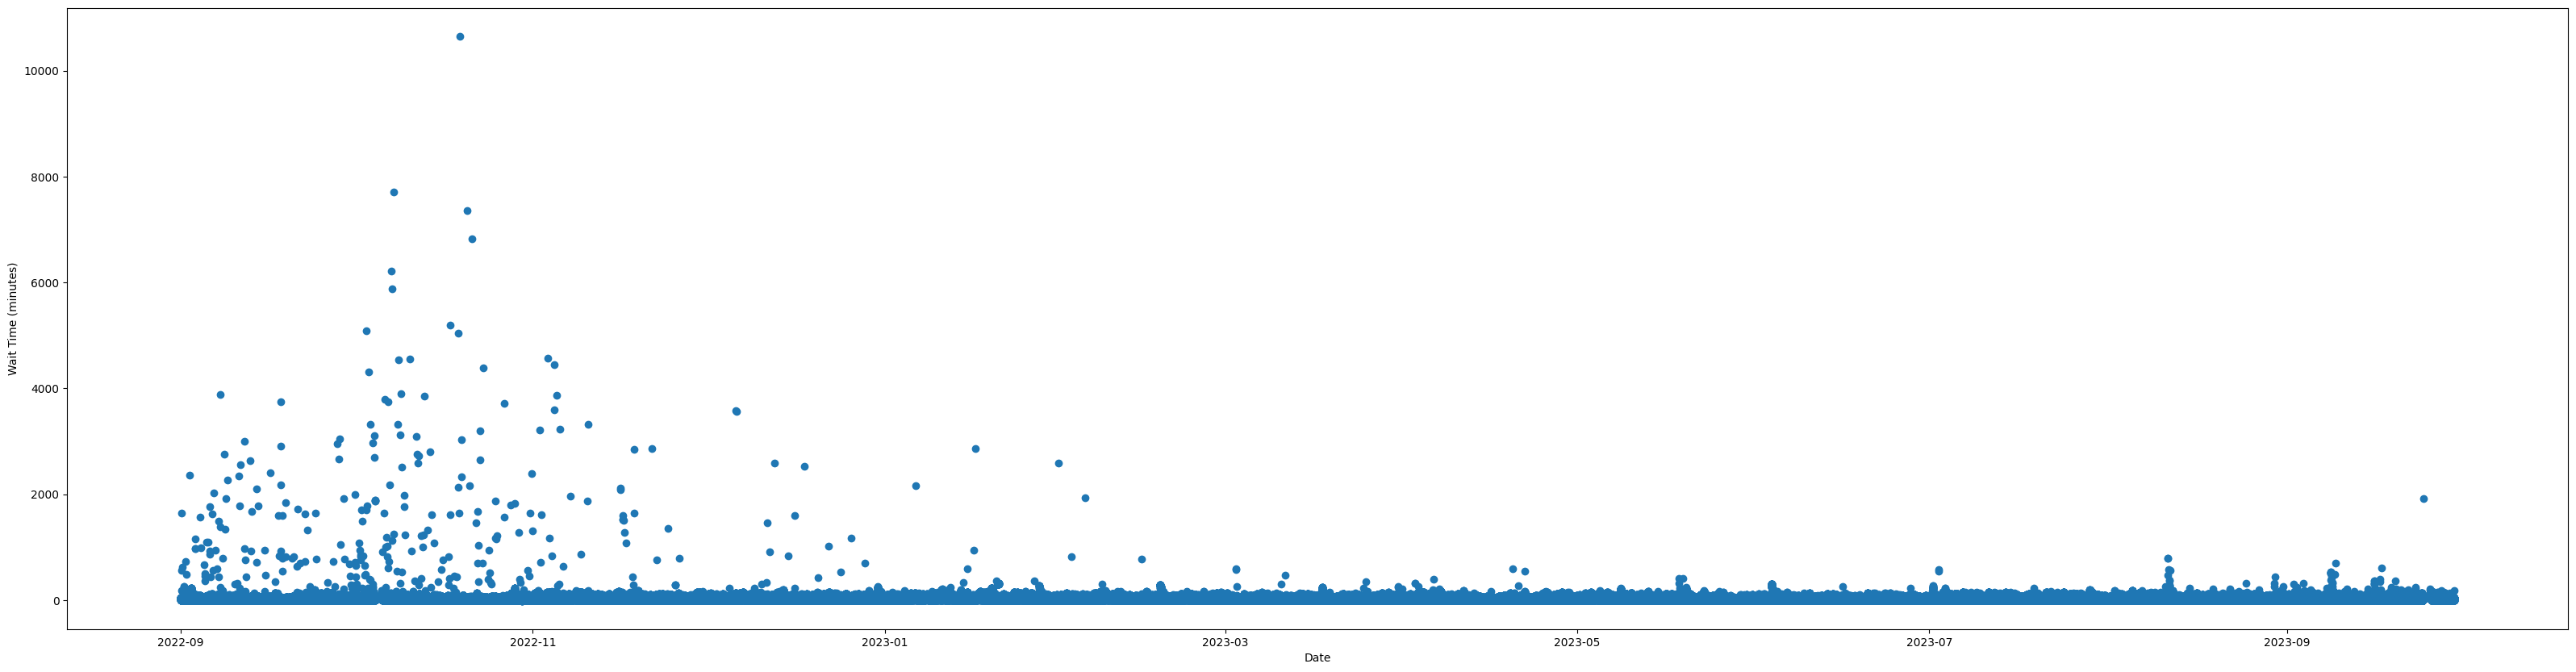

In [4]:
plt.figure(figsize=(40, 10))
plt.scatter(data['start_time'], data['wait'])
plt.xlabel('Date')
plt.ylabel('Wait Time (minutes)')
plt.show()


Removing rows with an unreasonable date - a date greater than today's date

In [5]:

import datetime

# Get today's date
today_date = datetime.date.today()

# Convert date columns to datetime if they are not already in datetime format
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

# Filter rows where 'start_time_date' and 'end_time_date' are not greater than today's date
data = data[(data['start_time'].dt.date <= today_date) & (data['end_time'].dt.date <= today_date)]

# 'data' contains rows where dates are not greater than today's date
data

,start_time,end_time,wait
0,2022-09-01 00:00:00,2022-09-01 00:15:00,42
1,2022-09-01 00:00:00,2022-09-01 00:15:00,42
2,2022-09-01 00:00:00,2022-09-01 00:15:00,41
3,2022-09-01 00:00:00,2022-09-01 00:15:00,30
4,2022-09-01 00:00:00,2022-09-01 00:15:00,41
...,...,...,...
906926,2023-09-29 23:45:00,2023-09-30 00:00:00,9
906927,2023-09-29 23:45:00,2023-09-30 00:00:00,16
906928,2023-09-29 23:45:00,2023-09-30 00:00:00,18
906929,2023-09-29 23:45:00,2023-09-30 00:00:00,8


Displaying all the data after Removing rows with an unreasonable date

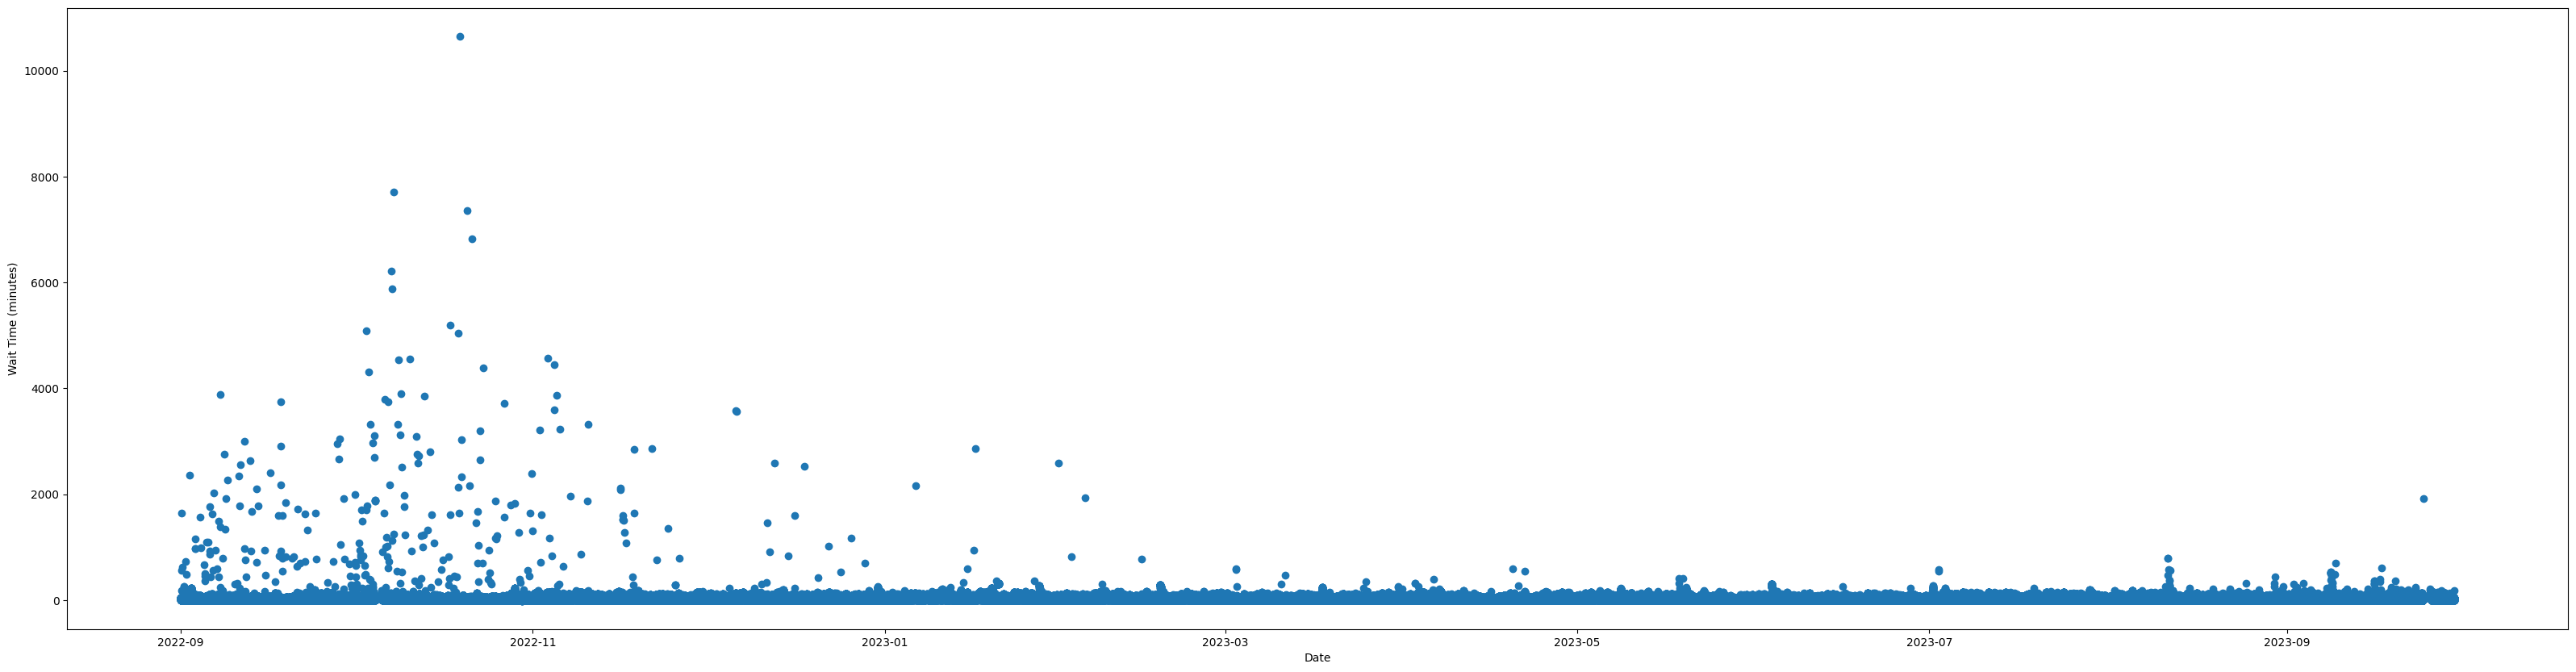

In [6]:
plt.figure(figsize=(40, 10))
plt.scatter(data['start_time'], data['wait'])
plt.xlabel('Date')
plt.ylabel('Wait Time (minutes)')
plt.show()


Waiting time distribution

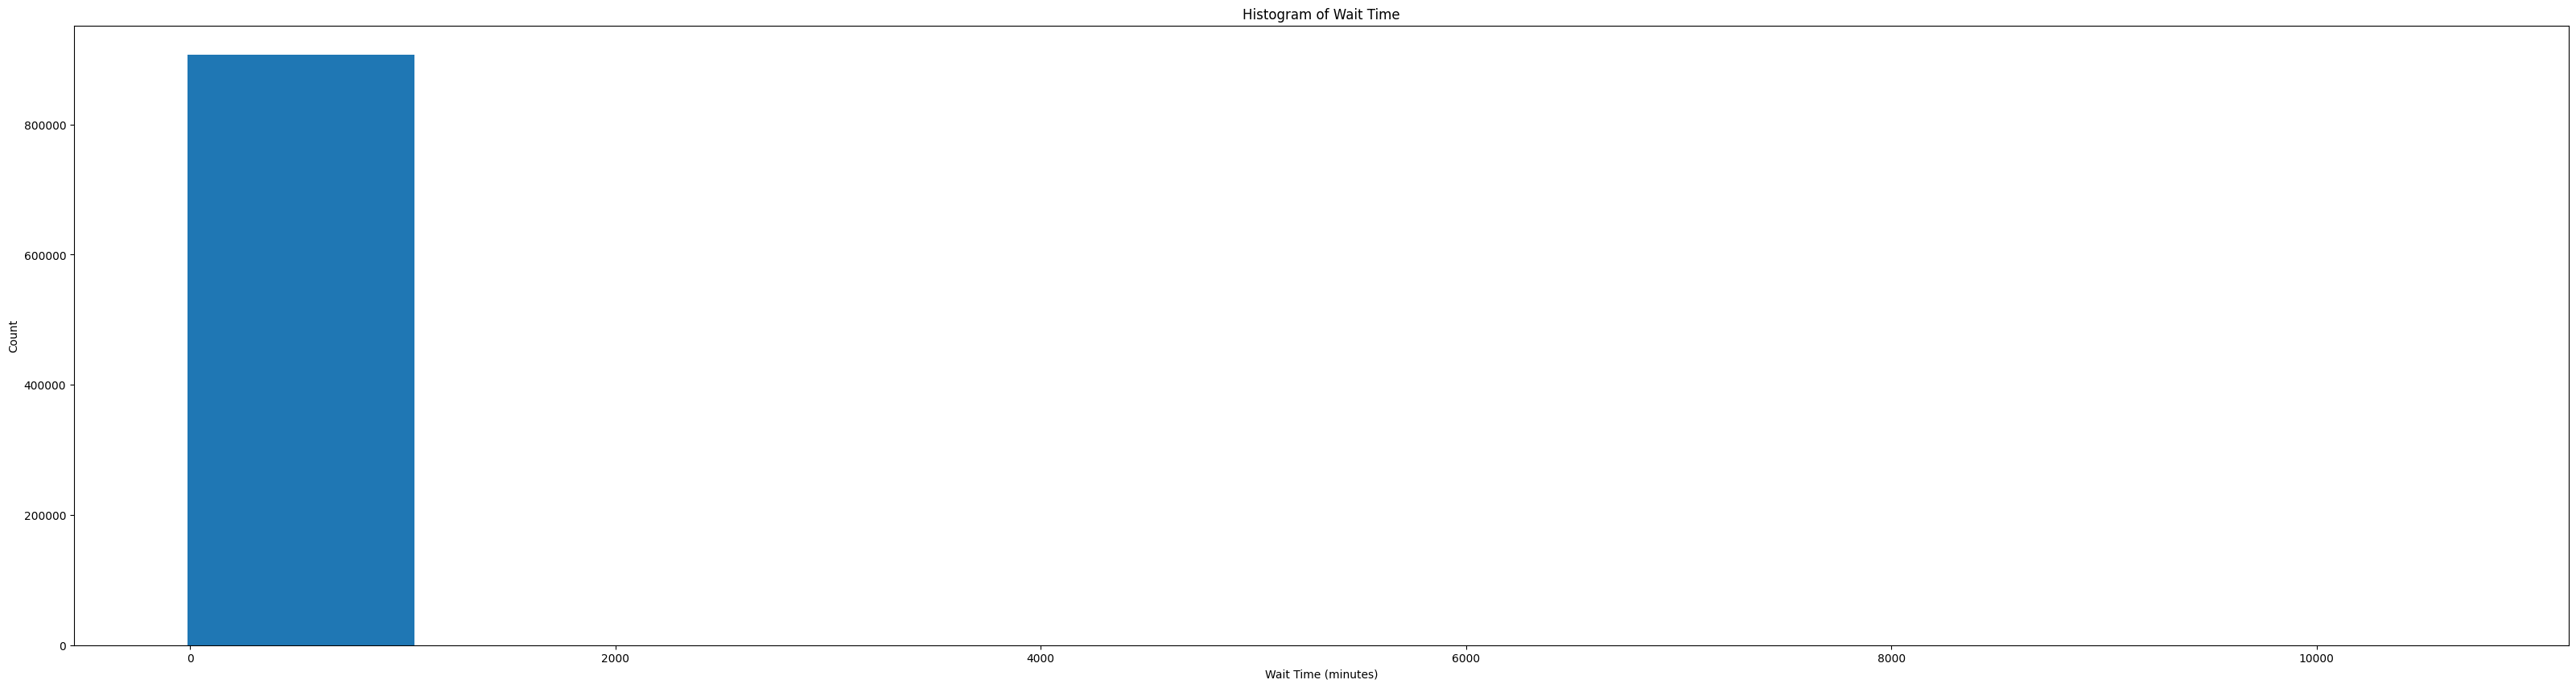

In [7]:
plt.figure(figsize=(40, 10))
plt.hist( data['wait'])
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Count')
plt.title('Histogram of Wait Time')

plt.show()


Removing values above 400 and below 0 minutes

In [8]:
print(data[data['wait'] < 0].shape[0])
print(data[data['wait'] >400].shape[0])

12
268


In [9]:
data_clean = data[(data['wait'] < 400) & (data['wait'] > 0)]
data_clean

,start_time,end_time,wait
0,2022-09-01 00:00:00,2022-09-01 00:15:00,42
1,2022-09-01 00:00:00,2022-09-01 00:15:00,42
2,2022-09-01 00:00:00,2022-09-01 00:15:00,41
3,2022-09-01 00:00:00,2022-09-01 00:15:00,30
4,2022-09-01 00:00:00,2022-09-01 00:15:00,41
...,...,...,...
906926,2023-09-29 23:45:00,2023-09-30 00:00:00,9
906927,2023-09-29 23:45:00,2023-09-30 00:00:00,16
906928,2023-09-29 23:45:00,2023-09-30 00:00:00,18
906929,2023-09-29 23:45:00,2023-09-30 00:00:00,8


Waiting time distribution after Removing values above 400 and below 0 minutes

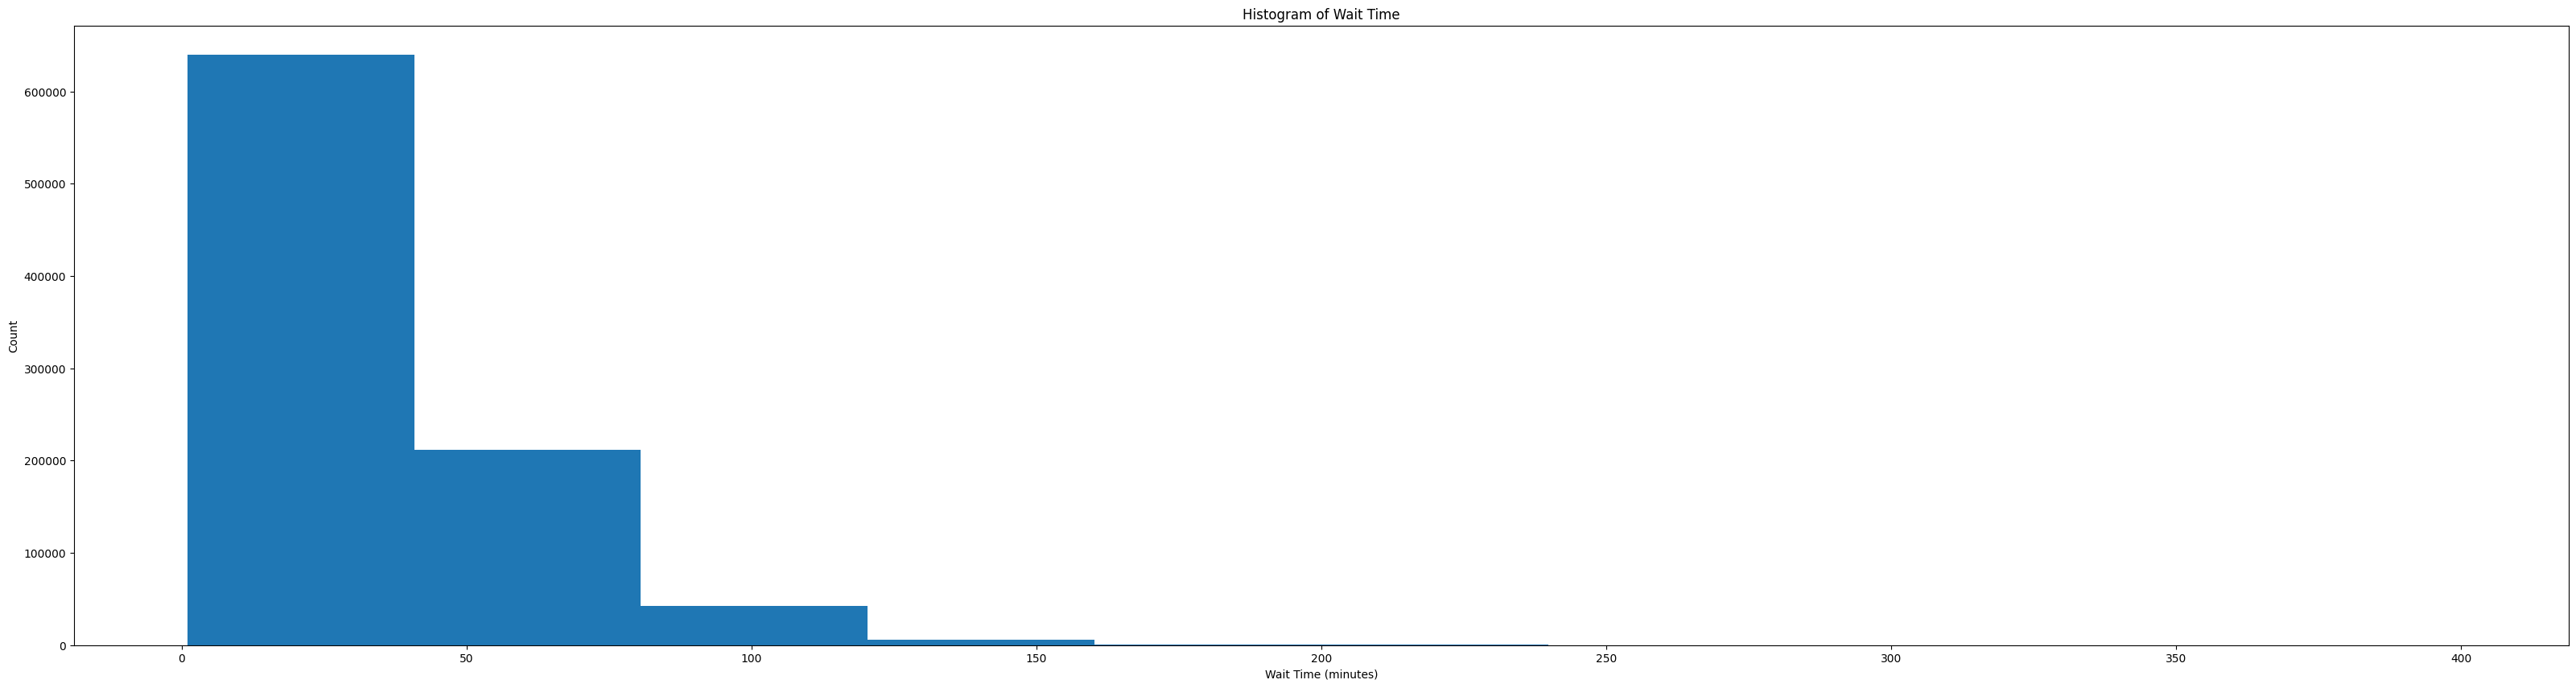

In [10]:
plt.figure(figsize=(40, 10))
plt.hist( data_clean['wait'])
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Count')
plt.title('Histogram of Wait Time')

plt.show()


Removing values from 2.5% above and below in the distribution

In [11]:
# Calculate the 2.5th and 97.5th percentiles
percentile_2_5 = data_clean['wait'].quantile(0.025)
percentile_97_5 = data_clean['wait'].quantile(0.975)

# Filter the data to include only the central 95%
filtered_data_clean = data_clean[(data_clean['wait'] >= percentile_2_5) & (data['wait'] <= percentile_97_5)]
filtered_data_clean

<ipython-input-11-5895e77cb616>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data_clean = data_clean[(data_clean['wait'] >= percentile_2_5) & (data['wait'] <= percentile_97_5)]


,start_time,end_time,wait
0,2022-09-01 00:00:00,2022-09-01 00:15:00,42
1,2022-09-01 00:00:00,2022-09-01 00:15:00,42
2,2022-09-01 00:00:00,2022-09-01 00:15:00,41
3,2022-09-01 00:00:00,2022-09-01 00:15:00,30
4,2022-09-01 00:00:00,2022-09-01 00:15:00,41
...,...,...,...
906926,2023-09-29 23:45:00,2023-09-30 00:00:00,9
906927,2023-09-29 23:45:00,2023-09-30 00:00:00,16
906928,2023-09-29 23:45:00,2023-09-30 00:00:00,18
906929,2023-09-29 23:45:00,2023-09-30 00:00:00,8


Waiting time distribution

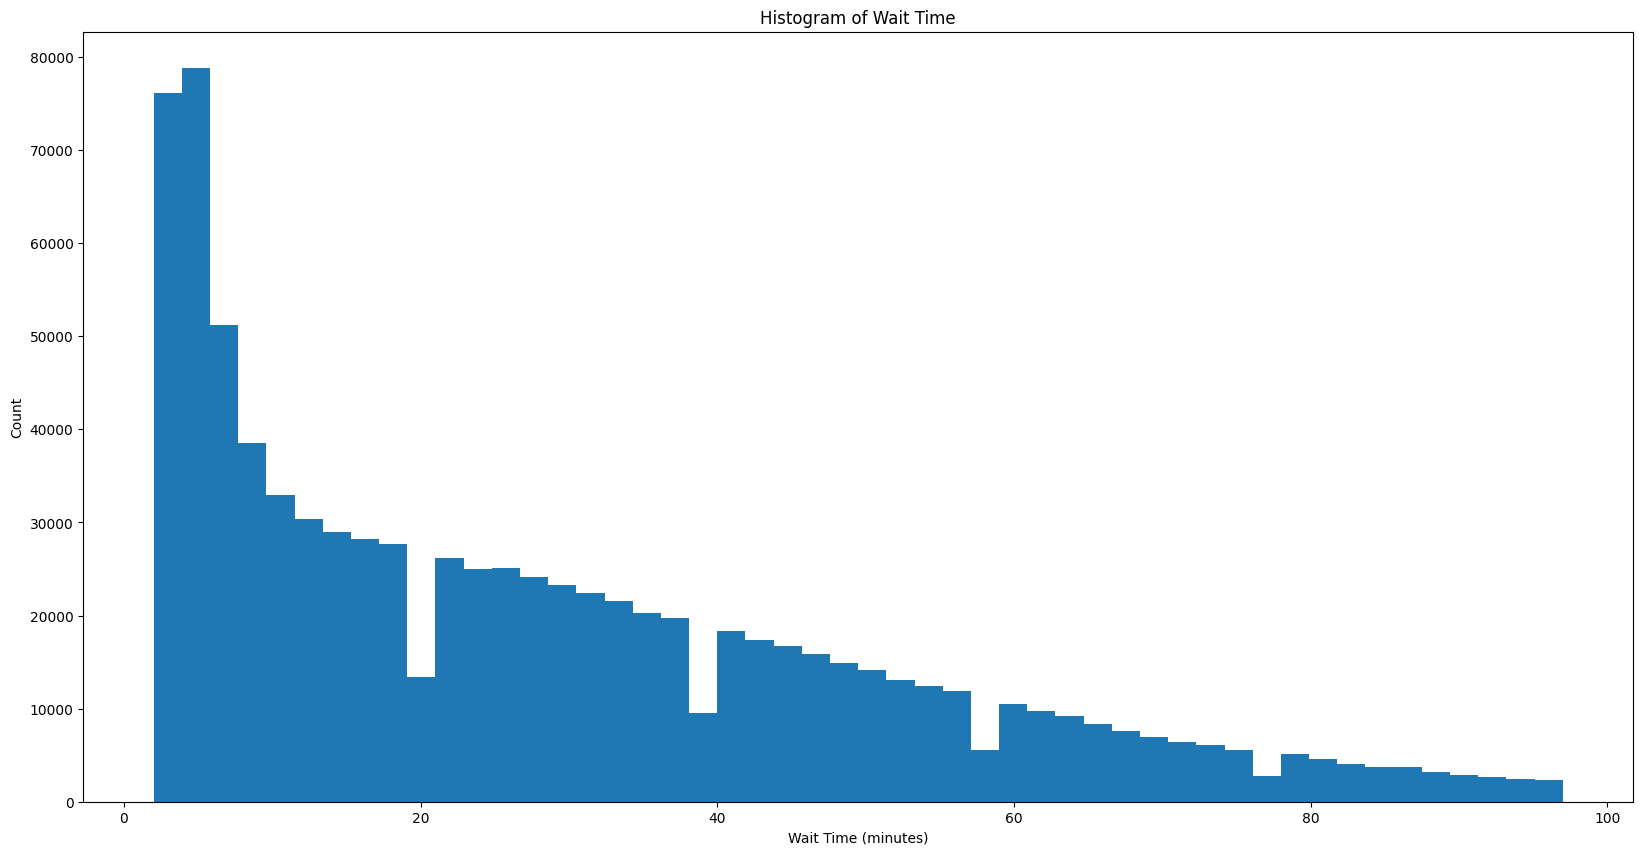

In [12]:
plt.figure(figsize=(20, 10))
plt.hist( filtered_data_clean['wait'],bins =50)
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Count')
plt.title('Histogram of Wait Time')

plt.show()


Waiting time distribution (smaller bins)

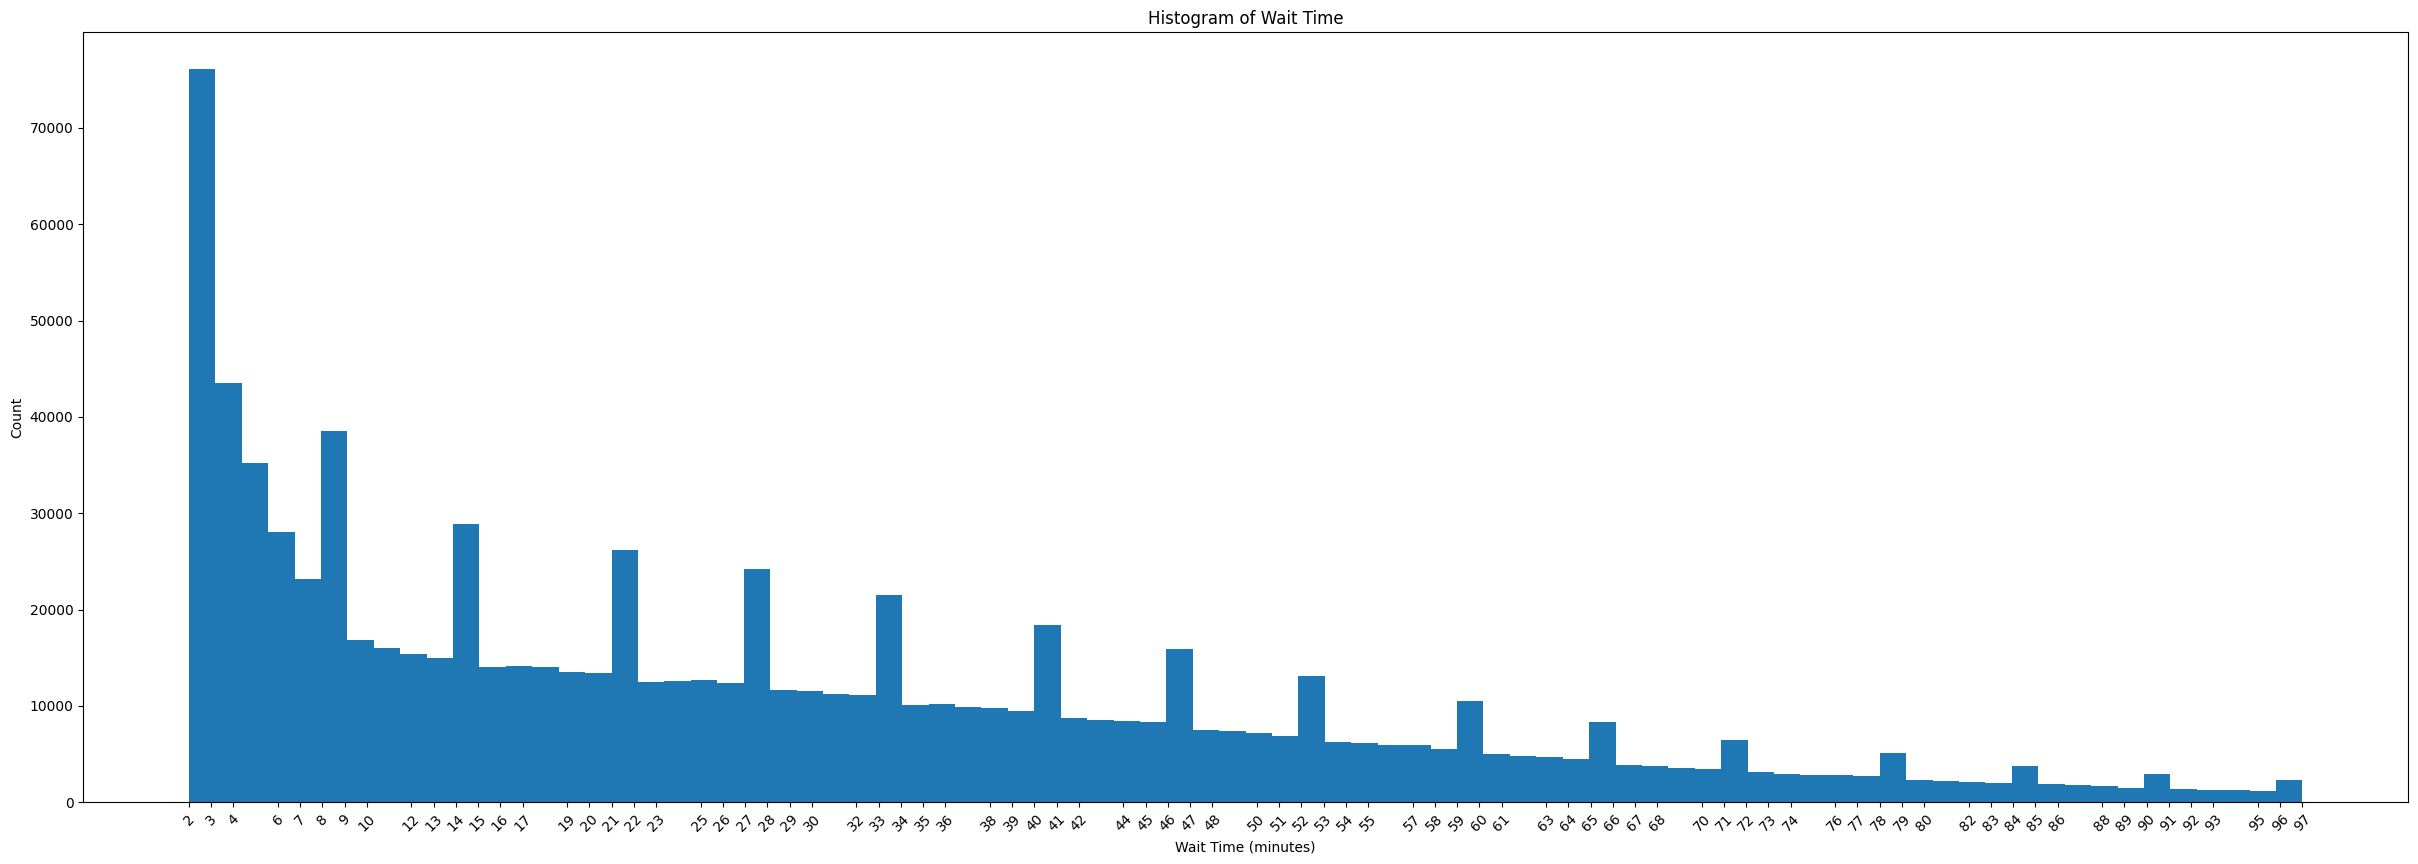

n: [76122. 43529. 35243. 28013. 23165. 38504. 16869. 16030. 15411. 14998.
 28937. 14050. 14130. 14084. 13551. 13395. 26227. 12435. 12612. 12687.
 12425. 24167. 11700. 11575. 11256. 11180. 21538. 10101. 10198.  9924.
  9766.  9484. 18381.  8758.  8570.  8439.  8304. 15863.  7526.  7424.
  7239.  6873. 13110.  6296.  6139.  5966.  5924.  5573. 10463.  4972.
  4784.  4727.  4475.  8302.  3916.  3729.  3587.  3417.  6465.  3126.
  2977.  2792.  2794.  2725.  5073.  2348.  2203.  2084.  1996.  3738.
  1930.  1762.  1661.  1502.  2908.  1362.  1286.  1250.  1159.  2315.]
bins: [ 2.      3.1875  4.375   5.5625  6.75    7.9375  9.125  10.3125 11.5
 12.6875 13.875  15.0625 16.25   17.4375 18.625  19.8125 21.     22.1875
 23.375  24.5625 25.75   26.9375 28.125  29.3125 30.5    31.6875 32.875
 34.0625 35.25   36.4375 37.625  38.8125 40.     41.1875 42.375  43.5625
 44.75   45.9375 47.125  48.3125 49.5    50.6875 51.875  53.0625 54.25
 55.4375 56.625  57.8125 59.     60.1875 61.375  62.5625 63.75 

In [13]:
plt.figure(figsize=(30, 10))
n, bins, patches = plt.hist(filtered_data_clean['wait'], bins=80)

bins_rounded = np.unique(np.round(bins).astype(int))

plt.xticks(bins_rounded, rotation=45)

plt.xlabel('Wait Time (minutes)')
plt.ylabel('Count')
plt.title('Histogram of Wait Time')

plt.show()

print("n:", n) #n will contain the number of items in each bin (column height).
print("bins:", bins) #bins will contain the boundaries of each bin.
print("patches:", patches) #patches will contain the Rectangle objects that represent the columns
print("bins_rounded:", bins_rounded)


groupby by date hour and wait

In [14]:
# Convert 'arrived_to_airport_start_interval' to datetime
filtered_data_clean['start_time'] = pd.to_datetime(filtered_data_clean['start_time'])

# Extract the hour and date from 'arrived_to_airport_start_interval'
filtered_data_clean['date'] = filtered_data_clean['start_time'].dt.date
filtered_data_clean['hour'] = filtered_data_clean['start_time'].dt.hour
filtered_data_clean['minute'] = filtered_data_clean['start_time'].dt.minute


# Group by 'date' and 'hour' and calculate the average 'minutes_to_order'
grouped_filtered_data_clean = filtered_data_clean.groupby(['start_time','date', 'hour','minute'])['wait'].mean().reset_index()

# Rename columns for clarity
grouped_filtered_data_clean.columns = ['start_time','date', 'hour','minute', 'Average_Minutes_to_wait']
grouped_filtered_data_clean[grouped_filtered_data_clean['date']=='2023-05-09']

<ipython-input-14-e7e8de5f9c34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_clean['start_time'] = pd.to_datetime(filtered_data_clean['start_time'])
<ipython-input-14-e7e8de5f9c34>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_clean['date'] = filtered_data_clean['start_time'].dt.date
<ipython-input-14-e7e8de5f9c34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,start_time,date,hour,minute,Average_Minutes_to_wait


Scatter Plot of Wait Time Average by Hour for date

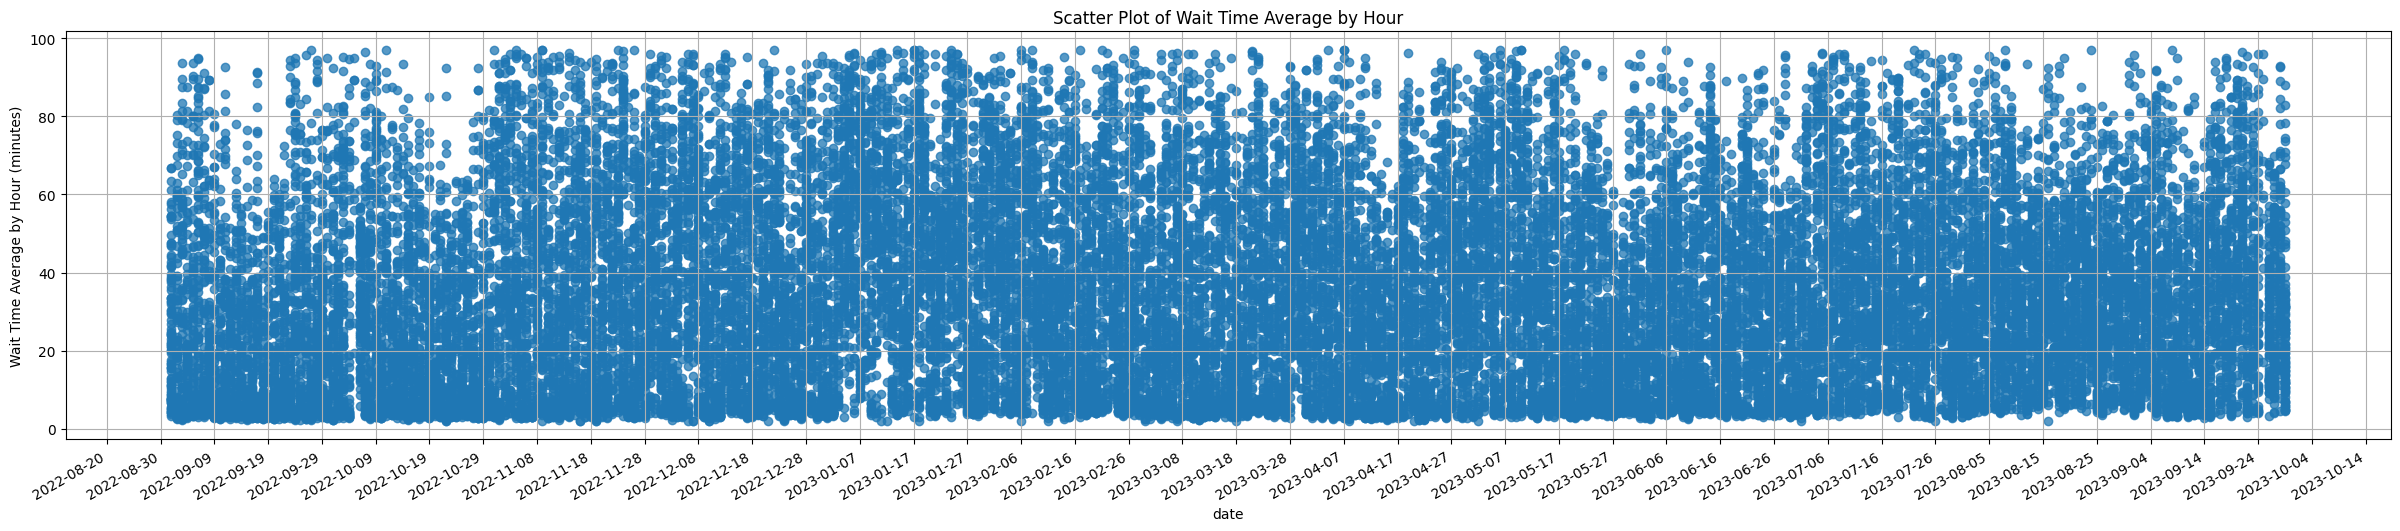

In [15]:
# לפי שעה תאריך וזמן המתנה
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(30, 6))

plt.scatter(grouped_filtered_data_clean['date'], grouped_filtered_data_clean['Average_Minutes_to_wait'], alpha=0.75)

plt.xlabel('date')
plt.ylabel('Wait Time Average by Hour (minutes)')
plt.title('Scatter Plot of Wait Time Average by Hour')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # תווית כל 10 ימים
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()

plt.show()


Hour of the Day

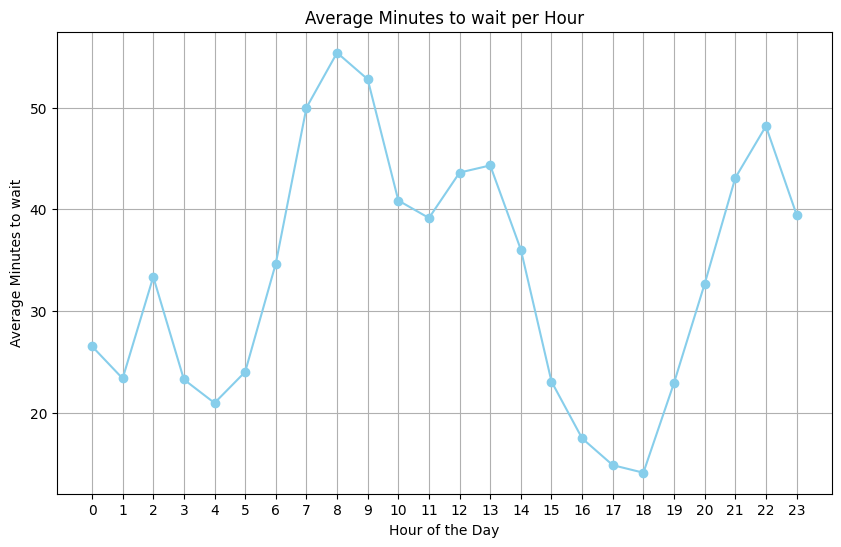

In [16]:
# שעה וזמן המתנה ממוצע לפי שעה
# Group by 'date' and 'hour' and calculate the average 'Average_Minutes_to_wait'
grouped_h = grouped_filtered_data_clean.groupby('hour')['Average_Minutes_to_wait'].mean().reset_index()

# Plotting the results-per hour
plt.figure(figsize=(10, 6))
plt.plot(grouped_h['hour'], grouped_h['Average_Minutes_to_wait'], marker='o', linestyle='-', color='skyblue')
plt.title('Average Minutes to wait per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Minutes to wait')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Average Minutes to wait per Weekday and Hour

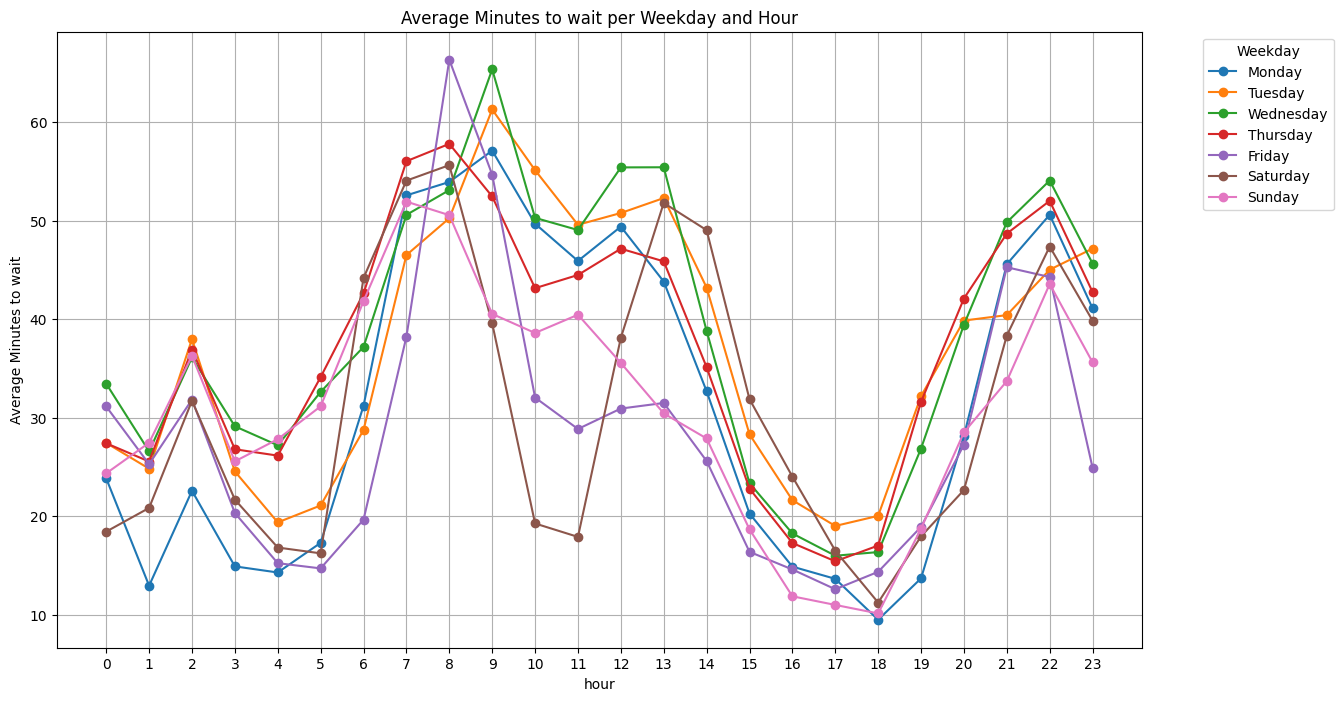

In [17]:
#פלוט של WEEKDAY פר שעה - ממוצע המתנה
grouped_filtered_data_clean['date'] = pd.to_datetime(grouped_filtered_data_clean['date'])

#extract the weekday
grouped_filtered_data_clean['weekday'] = grouped_filtered_data_clean['date'].dt.day_name()

# Group by 'hour' and 'weekday' and calculate the average 'Average_Minutes_to_Order'
grouped_df_weekly = grouped_filtered_data_clean.groupby(['hour', 'weekday'], as_index=False)['Average_Minutes_to_wait'].mean()

# Pivot the DataFrame to get a matrix-like DataFrame for plotting
pivot_df = grouped_df_weekly.pivot(index='hour', columns='weekday', values='Average_Minutes_to_wait')

# Reorder columns to ensure the correct order of weekdays
pivot_df = pivot_df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Plotting the results
plt.figure(figsize=(14, 8))
for day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[day], marker='o', linestyle='-', label=day)

plt.title('Average Minutes to wait per Weekday and Hour')
plt.xlabel('hour')
plt.ylabel('Average Minutes to wait')
plt.xticks(range(24))
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Average Minutes to Order per Day of Month


In [18]:
# יכול להיות שמבינים מזה שנהגי מונית בתחילת חודש קצת עצלניים ולקראת אמצע סוף החודש הם לחוצים יותר על כסף

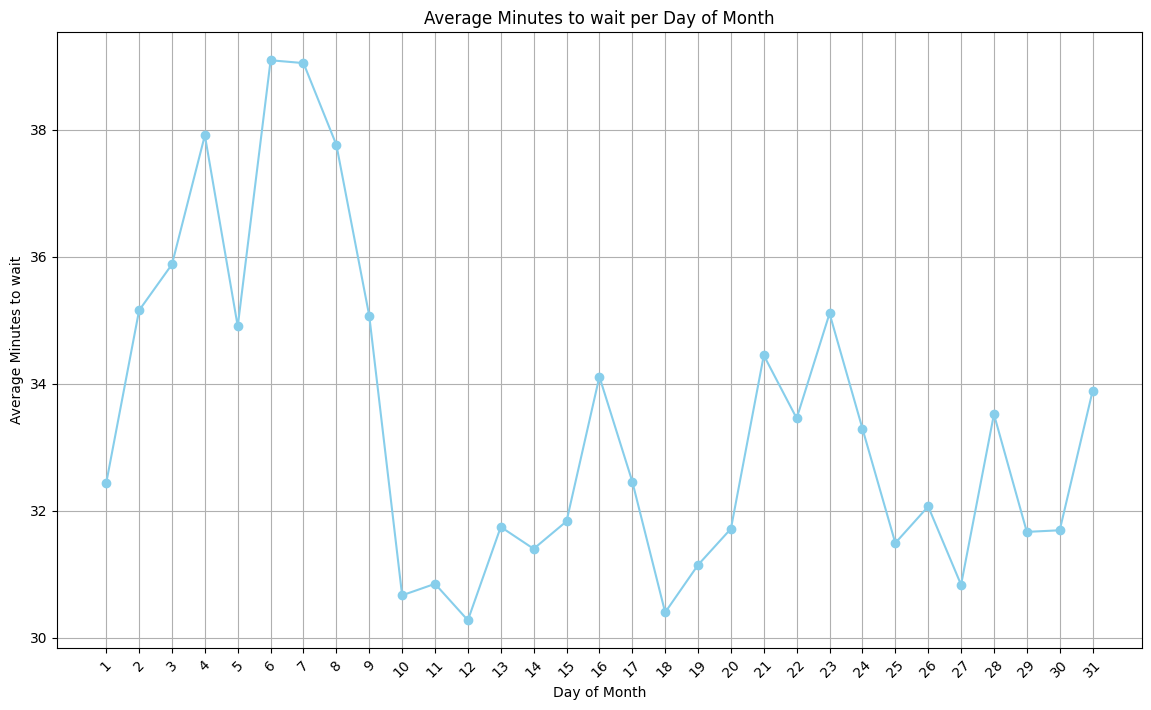

In [19]:
# Extract the day of the month
grouped_filtered_data_clean['day'] = grouped_filtered_data_clean['date'].dt.day

# Group by 'day' and calculate the average 'Average_Minutes_to_Order'
daily_avg = grouped_filtered_data_clean.groupby('day')['Average_Minutes_to_wait'].mean()

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(daily_avg.index, daily_avg.values, marker='o', linestyle='-', color='skyblue')
plt.title('Average Minutes to wait per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Minutes to wait')
plt.xticks(range(1, 32), rotation=45)
plt.grid(True)
plt.show()

Average Minutes to Order per Month of Year


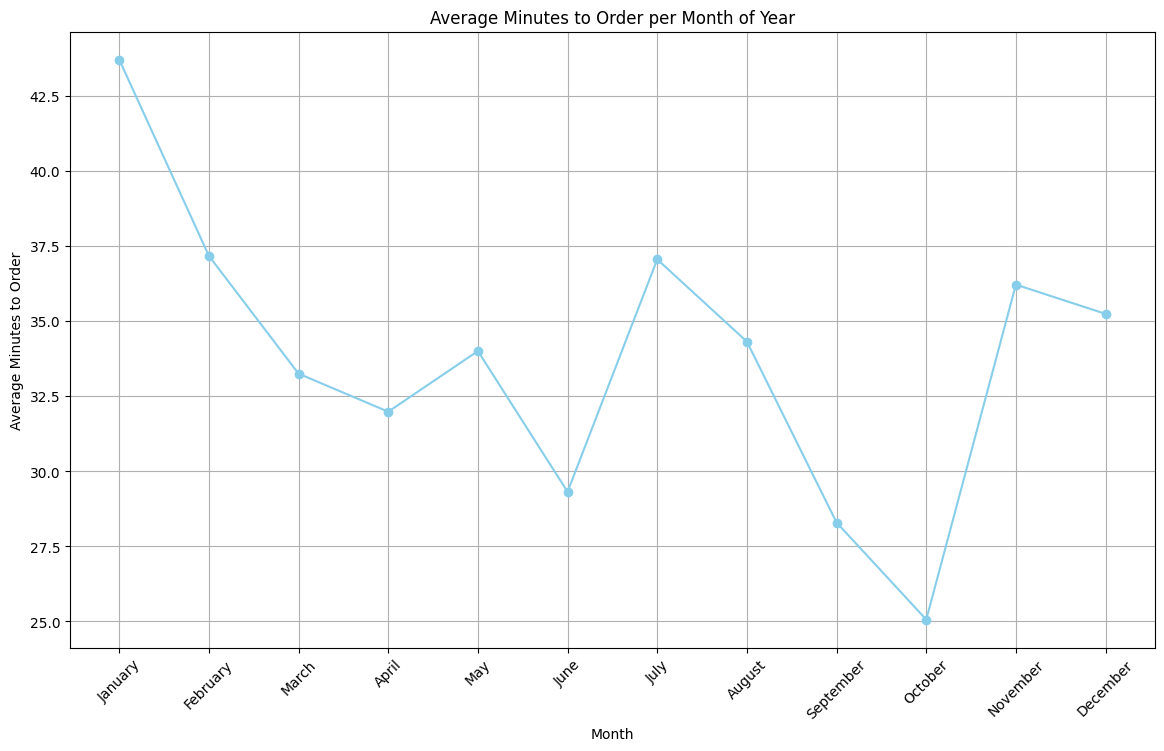

In [20]:
# Extract the month of the year
grouped_filtered_data_clean['month'] = grouped_filtered_data_clean['date'].dt.month_name()

# Group by 'month' and calculate the average 'Average_Minutes_to_Order'
monthly_avg = grouped_filtered_data_clean.groupby('month')['Average_Minutes_to_wait'].mean()

# Reorder the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(months_order)

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='skyblue')
plt.title('Average Minutes to Order per Month of Year')
plt.xlabel('Month')
plt.ylabel('Average Minutes to Order')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

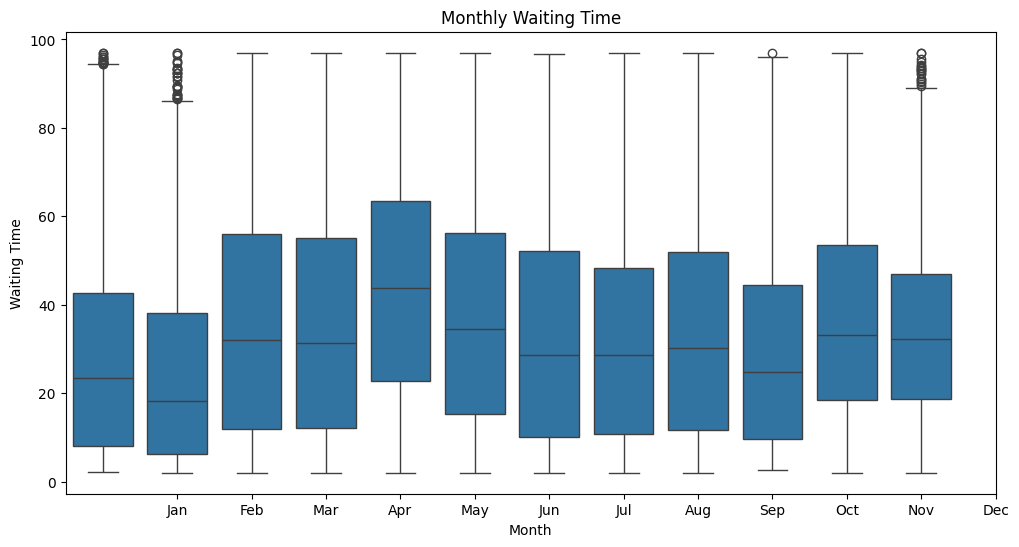

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='Average_Minutes_to_wait', data=grouped_filtered_data_clean)
plt.title('Monthly Waiting Time')
plt.xlabel('Month')
plt.ylabel('Waiting Time')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [22]:
monthly_counts = grouped_filtered_data_clean.groupby('month').size()

print(monthly_counts)


month
April        2824
August       2948
December     2912
February     2612
January      2806
July         2913
June         2859
March        2942
May          2917
November     2771
October      2805
September    5451
dtype: int64


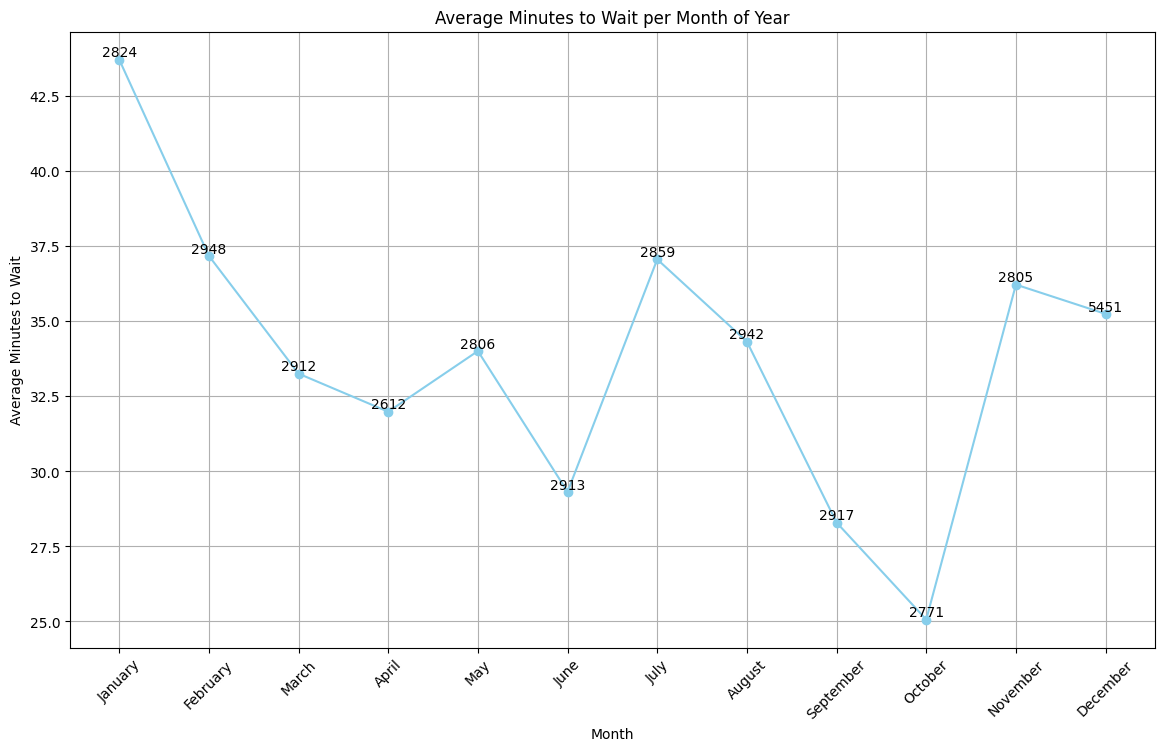

In [23]:
# הוספת מספר הנהגים בכל חודש
import pandas as pd
import matplotlib.pyplot as plt

monthly_avg = grouped_filtered_data_clean.groupby('month')['Average_Minutes_to_wait'].mean()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(months_order)

monthly_counts = grouped_filtered_data_clean.groupby('month').size()

# הצגת גרף ממוצע דקות המתנה לכל חודש
plt.figure(figsize=(14, 8))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='skyblue')

# הוספת הכותרות למספר הנהגים בכל חודש
for i, count in enumerate(monthly_counts):
    plt.text(i, monthly_avg[i], f'{count}', ha='center', va='bottom')

plt.title('Average Minutes to Wait per Month of Year')
plt.xlabel('Month')
plt.ylabel('Average Minutes to Wait')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [24]:
grouped_filtered_data_clean.to_csv('clean_data_entered.csv',index=False)